In [2]:
import gym
import copy
import numpy as np
import time as time
import torch
import torch.nn as nn
import gym_flappyBird
import genetics as gen
from tensorboardX import SummaryWriter
import matplotlib.pyplot as plt
import math
import pygame
from pygame.locals import *

pygame 2.0.2 (SDL 2.0.16, Python 3.8.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Maschine

<img src="sprites/bestaerkendes-lernen.png" align="left" >

## Feature extrahieren

<img src="sprites/ingame.jpg" align="left" >

In [3]:
def generateFeatures(state):
    bird = state['bird']
    #print(type(bird))
    posY = bird.Y
    speedY = bird.speedY
    pipes = state['pipes']
    #print(pipes[0].pos)
    return posY, speedY, pipes[0].pos,pipes[0].height,pipes[0].gap

# Neuronales Netz 

## Layer
nn.Linear(X, Y), Input dim X, Output dim Y

## Aktivierungsfunktionen
nn.ReLU()


nn.Sigmoid()


nn.Softmax(dim=1))



## Topologie
nn.Sequential(Layer, Aktivierungsfunktion, Layer, Aktivierungsfunktion...., Layer)
###### Beispiel
nn.Sequential(nn.Linear(5, 5),nn.Sigmoid(),nn.Linear(5, 1))

### https://pytorch.org/docs/stable/nn.html#linear-layers
### https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html?highlight=sigmoid#torch.nn.Sigmoid


In [4]:
net = nn.Sequential(nn.Linear(5, 5),nn.Sigmoid(),nn.Linear(5, 5),nn.Sigmoid(), nn.Linear(5, 1))

In [5]:
for name, param in net.named_parameters():
    print(name, param)

0.weight Parameter containing:
tensor([[-0.3507,  0.1350,  0.1308, -0.0558,  0.0381],
        [ 0.3266,  0.1077,  0.3589,  0.2621,  0.2730],
        [-0.0237,  0.0542, -0.1662,  0.1244,  0.0603],
        [-0.3729, -0.2162,  0.3737, -0.3071, -0.2598],
        [ 0.0563,  0.0954, -0.4022, -0.1439, -0.1455]], requires_grad=True)
0.bias Parameter containing:
tensor([ 0.4219, -0.1343, -0.1661, -0.2284,  0.0529], requires_grad=True)
2.weight Parameter containing:
tensor([[ 0.4027,  0.1578,  0.3364, -0.3147, -0.2224],
        [-0.4249,  0.2608,  0.3275, -0.2274,  0.4356],
        [-0.2225,  0.2298,  0.4133, -0.3193, -0.1464],
        [ 0.3744, -0.0032, -0.4056,  0.2304, -0.1739],
        [ 0.2459, -0.1205, -0.3487,  0.0404,  0.1783]], requires_grad=True)
2.bias Parameter containing:
tensor([ 0.0307, -0.0473, -0.1972, -0.1028,  0.2708], requires_grad=True)
4.weight Parameter containing:
tensor([[ 0.3334,  0.3534,  0.4299,  0.4174, -0.4438]], requires_grad=True)
4.bias Parameter containing:
tens

# Aktion festlegen

  
## Bird attributes

### bird.forceX 
### bird.forceY 

### bird.speedX  (default 20)
### bird.speedY

In [6]:
def birdAction(decission, bird):
        bird.forceY =50*decission[0]


## Reward  berechnen

<img src="sprites/ingame_2.jpg" align="left" >

In [7]:
def computeReward(state_old, state_new):
    return 1

# Mutationsparameter

<img src="sprites/ingame_3.jpg" align="left" >

In [8]:
POPULATION_SIZE = 50 #Anzahl der Vögel in der Population
PARENTS_COUNT = 10 #Anzahl der besten Vögel, aus denen dann mutiert wird
NOISE_STD = 0.1 #Mutationsstärke 

## Abstand zwischen den Pipes,  Höhe der Pipes, Grösse der Lücke

In [9]:
Interval_distance = [250, 350]
Interval_height = [100,300]
Interval_gap = [120,130]

## Max Score

In [10]:
Score_Max = 4000

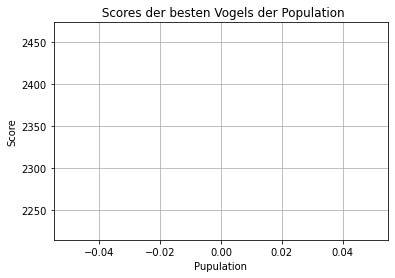

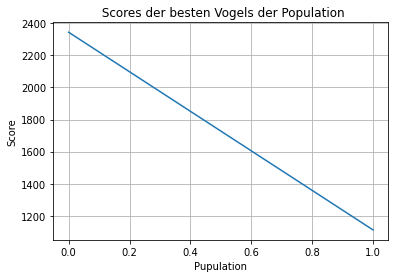

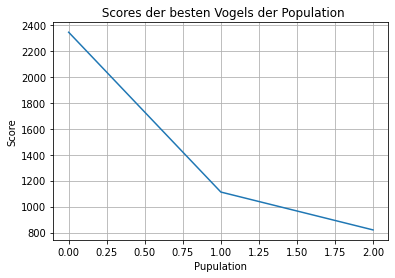

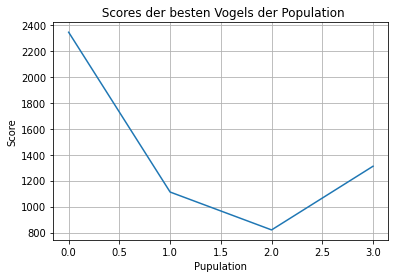

evaluaton
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  5
____________________________________________________________________________
Score Training:  1565.0  Score Spiel:  563.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[-1.9637, -2.0442,  0.0589,  2.2147,  0.0040],
        [ 0.0644, -0.6317,  1.8763, -0.2278,  2.0877],
        [-1.4037, -0.1452, -0.0654, -0.7340, -1.8876],
        [ 1.6993,  0.3931,  1.4085, -1.2328,  1.0003],
        [-0.4994, -0.5583, -0.0371, -0.5969, -0.2724]], requires_grad=True)
0.bias Parameter containing:
tensor([ 1.4324,  1.4717, -0.8257, -0.7121,  1.1631], requires_grad=True)
2.weight Parameter containing:
tensor([[ 0.1527, -0.4740, -0.1500, -1.9770, -0.2223],
        [-0.9838,  0.4698,  2.9586, -1.0147, -0.1940],
        [-0.1713,  0.3035,  1.7763,  0.2171,  1.785

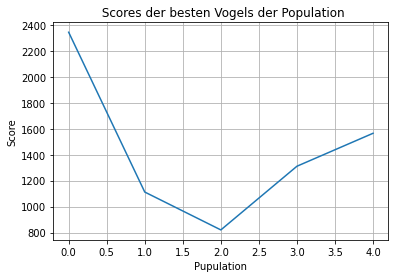

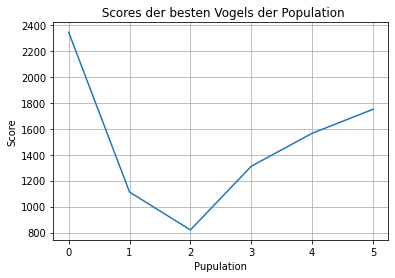

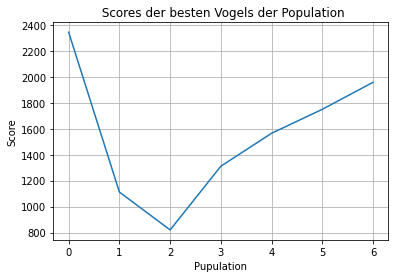

KeyboardInterrupt: 

In [13]:
fittestBirds = []

env = gym.make("scienceCampBird-v1")
env.setPipeIntervals([Interval_distance, Interval_height,Interval_gap])
population = gen.Population(POPULATION_SIZE, 5, 2, computeReward, net)
env.setAction(birdAction)
  #  print(len(population.nets))
population.evaluate_on_env(env,generateFeatures, Score_Max)
ecount = 0  
while True:
    population = gen.mutate_population(population, PARENTS_COUNT, NOISE_STD)
    population.evaluate_on_env(env, generateFeatures, Score_Max)
    fittestBirds.append(population.population[0])
    ecount +=1
    if(ecount % 5 == 0):
        print("evaluaton")
        net = population.population[0][1]
        score_e = population.population[0][0]
        score_p = env.playWithNet(net, generateFeatures, Score_Max, computeReward, ecount)
        print("----------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------")
        print('Population: ', ecount)
        print("____________________________________________________________________________")
        print('Score Training: ', score_e, ' Score Spiel: ', score_p)
        print("____________________________________________________________________________")
        for name, param in net.named_parameters():
            print(name, param)
    scores = [score[0] for score in fittestBirds]
    fig, ax = plt.subplots()
    ax.plot(scores)

    ax.set(xlabel='Pupulation', ylabel='Score',
    title=' Scores der besten Vogels der Population')
    ax.grid()

    fig.savefig("test.png")
    plt.show()

# Plott

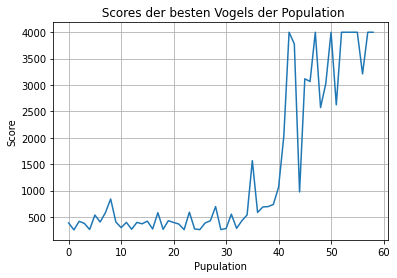

In [12]:
scores = [score[0] for score in fittestBirds]
fig, ax = plt.subplots()
ax.plot(scores)

ax.set(xlabel='Pupulation', ylabel='Score',
       title=' Scores der besten Vogels der Population')
ax.grid()

fig.savefig("test.png")
plt.show()

In [13]:
i = 0
for bird in fittestBirds:
        i +=1
        net = bird[1]
        score_p = bird[0]
        print("----------------------------------------------------------------------------")
        print("----------------------------------------------------------------------------")
        print('Population: ', i)
        print("____________________________________________________________________________")
        print('Score: ', score_p)
        print("____________________________________________________________________________")
        for name, param in net.named_parameters():
            print(name, param)

----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  1
____________________________________________________________________________
Score:  387.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[ 0.2628, -0.3972, -0.2392, -0.4395, -0.3048],
        [-0.2636, -0.1102,  0.2013,  0.1812, -0.3084],
        [-0.3233,  0.1421,  0.1352,  0.1036,  0.5309],
        [-0.4126, -0.5838,  0.2780, -0.2040, -0.1678],
        [ 0.4728,  0.3593, -0.0398, -0.0173,  0.2502]], requires_grad=True)
0.bias Parameter containing:
tensor([-0.2220, -0.3213,  0.2928, -0.2826, -0.2731], requires_grad=True)
2.weight Parameter containing:
tensor([[-0.0663,  0.2595,  0.0683,  0.0131, -0.1738],
        [-0.0707, -0.2943,  0.4500, -0.4879, -0.2655],
        [ 0.1923,  0.1683, -0.4462, -0.3773, -0.1236],
        [ 0.4589, -0.0666, -0.0639,  

2.bias Parameter containing:
tensor([-0.2294,  0.5119,  0.7642,  0.4160,  0.5020], requires_grad=True)
4.weight Parameter containing:
tensor([[-0.0602, -0.3556, -0.4609,  0.6329, -1.1038]], requires_grad=True)
4.bias Parameter containing:
tensor([0.7648], requires_grad=True)
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  29
____________________________________________________________________________
Score:  697.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[ 0.0180, -0.7963, -0.8498, -0.8604, -0.2180],
        [-0.2146,  0.0991,  0.2720,  0.3246,  0.1404],
        [-0.8257,  0.4514,  0.3791,  0.1331,  0.5328],
        [-0.3949,  0.0039, -0.1906,  0.4968, -0.0714],
        [ 0.6563,  0.7891, -0.1400, -0.8915, -0.3429]], requires_grad=True)
0.bias Parameter containing:
tensor([-0.6439, -0.5640, -0.2

2.weight Parameter containing:
tensor([[ 0.5285,  1.3502,  0.7010, -1.2508,  1.5100],
        [-0.9884, -0.2508, -0.3324, -0.7309, -1.0484],
        [ 0.6874, -1.6536, -0.7342, -0.3325,  1.7707],
        [ 0.5223, -1.5174, -0.7797,  0.9332,  1.7126],
        [-0.1147, -0.2212, -0.7458, -0.1738,  0.9820]], requires_grad=True)
2.bias Parameter containing:
tensor([0.4125, 0.2428, 0.5267, 0.1549, 0.3818], requires_grad=True)
4.weight Parameter containing:
tensor([[-0.6800,  0.6298, -0.6716, -0.4813, -0.9540]], requires_grad=True)
4.bias Parameter containing:
tensor([1.8922], requires_grad=True)
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Population:  58
____________________________________________________________________________
Score:  4000.0
____________________________________________________________________________
0.weight Parameter containing:
tensor([[ 3.2514e-01, -1.0755e+0